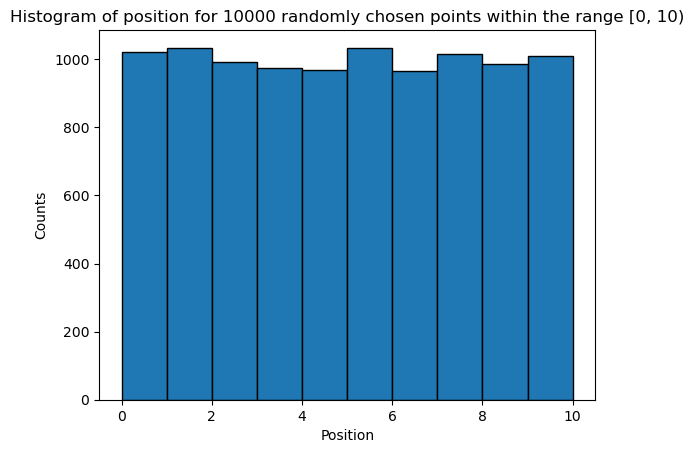

In [1]:
# 1.1 Problems, #1

import numpy as np
import matplotlib.pyplot as plt
import math

# set L
L = 10

# generate random numbers in the range [0, L)
random_numbers = np.random.uniform(0, L, size=10000)

# create and plot histogram
plt.hist(random_numbers, bins=10, edgecolor='black')
plt.title('Histogram of position for 10000 randomly chosen points within the range [0, 10)')
plt.xlabel('Position')
plt.ylabel('Counts')
plt.show()

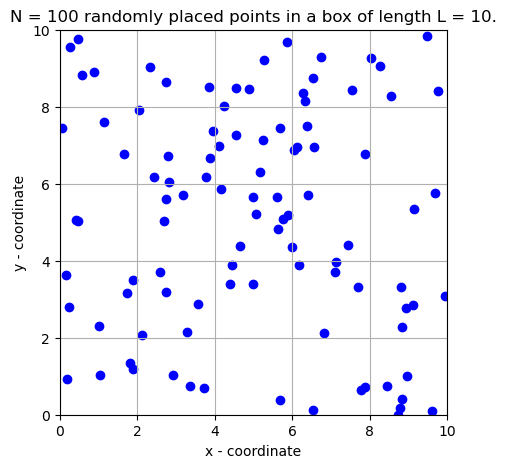

In [2]:
# 1.1 Problems, #2

import numpy as np
import matplotlib.pyplot as plt
import math

def place_objects(N, L):
    """
    randomly place N objects in a square box of length L 
    returns array of coordinates of placed objects
    """
    coordinates = np.random.uniform(0, L, size=(N, 2))
    return coordinates

N = 100
L = 10
object_coordinates = place_objects(N, L)

# plot
plt.figure(figsize=(5, 5))
plt.scatter(object_coordinates[:, 0], object_coordinates[:, 1], c='blue', marker='o')
plt.xlim(0, L)
plt.ylim(0, L)
plt.title(f'N = {N} randomly placed points in a box of length L = {L}.')
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.grid(True)
plt.show()

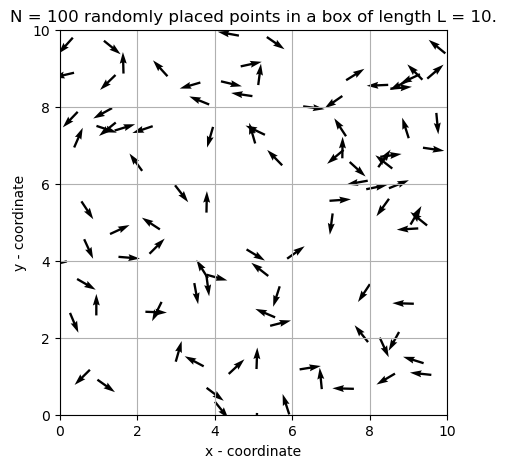

In [2]:
# 1.1 Problems, #3

import numpy as np
import matplotlib.pyplot as plt
import math

def initialize(N, L):
    x = np.random.uniform(0, L, N)
    y = np.random.uniform(0, L, N)
    theta = np.random.uniform(-math.pi, math.pi, N)
    
    return x, y, theta

N = 100  
L = 10
x, y, theta = initialize(N, L)

plt.figure(figsize=(5, 5))
plt.quiver(x, y, np.cos(theta), np.sin(theta))
plt.xlim(0, L)
plt.ylim(0, L)
plt.title(f'N = {N} randomly placed points in a box of length L = {L}.')
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.grid(True)
plt.show()

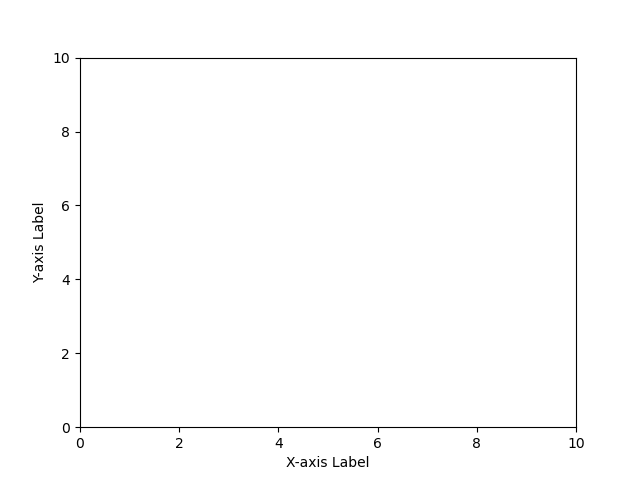

In [2]:
# 1.2 Problems, #1

import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib ipympl
from matplotlib.animation import FuncAnimation

def initialize(N, L):
    x = np.random.uniform(0, L, N)
    y = np.random.uniform(0, L, N)
    theta = np.random.uniform(-math.pi, math.pi, N)
    
    return x, y, theta

# update the position with periodic boundaries
def update_position(x, y, theta, v, delta_t, L):
    x_new = (x + v * np.cos(theta) * delta_t) % L
    y_new = (y + v * np.sin(theta) * delta_t) % L
    return x_new, y_new

# simulation parameters
L = 10
N = 1
v = 1
delta_t = 1
Nsteps = 100

x, y, theta = initialize(N, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_xlabel('X-axis Label') 
ax.set_ylabel('Y-axis Label')

# update function for the animation
def update(frame):
    global x, y, theta
    # updating particle's position
    x, y = update_position(x, y, theta, v, delta_t, L)
    
    # clear previous plot
    ax.cla()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_xlabel('X-axis Label') 
    ax.set_ylabel('Y-axis Label')

    # plotting new position
    ax.quiver(x, y, np.cos(theta), np.sin(theta), color='black')

# animation object
ani = FuncAnimation(fig, update, frames=np.arange(Nsteps), interval=500)

plt.show()

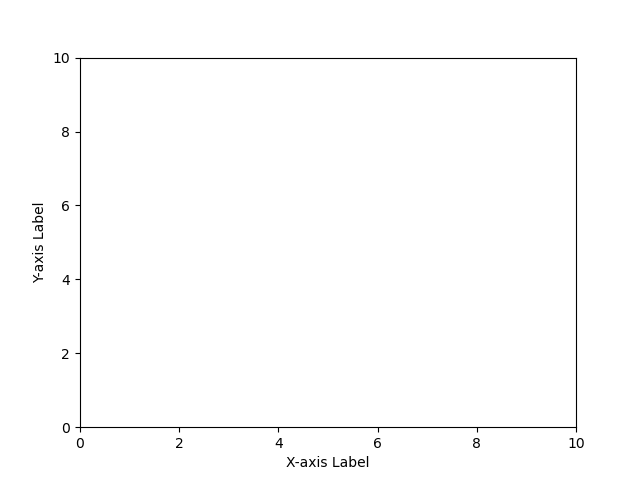

In [3]:
# 1.2 Problems, #2

import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib ipympl
from matplotlib.animation import FuncAnimation

def initialize(N, L):
    x = np.random.uniform(0, L, N)
    y = np.random.uniform(0, L, N)
    theta = np.random.uniform(-math.pi, math.pi, N)
    
    return x, y, theta

def update_position_with_noise(x, y, theta, v, delta_t, L, eta):
    # update orientation with noise
    delta_theta = np.random.uniform(-eta/2, eta/2)
    theta_new = theta + delta_theta

    # update the position with periodic boundaries
    x_new = (x + v * np.cos(theta_new) * delta_t) % L
    y_new = (y + v * np.sin(theta_new) * delta_t) % L

    return x_new, y_new, theta_new

# simulation parameters
L = 10
N = 1
v = 1
delta_t = 1
Nsteps = 100
eta = 3  # angular noise

x, y, theta = initialize(N, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')  

# update function for the animation
def animate(step):
    global x, y, theta
    # updating particle's position with noise
    x, y, theta = update_position_with_noise(x, y, theta, v, delta_t, L, eta)

    # clear previous plot
    ax.cla()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_xlabel('X-axis Label') 
    ax.set_ylabel('Y-axis Label')  

    
    # plotting new position with noise
    ax.quiver(x, y, np.cos(theta), np.sin(theta), color='black')

# animation object
ani = FuncAnimation(fig, animate, frames=Nsteps, interval=500, repeat=False)

plt.show()

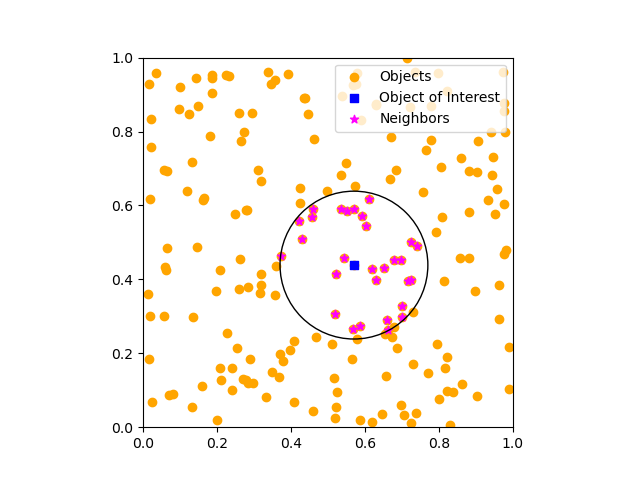

In [3]:
# 2 Problems, #1

import numpy as np
import matplotlib.pyplot as plt
import math

def initialize(N, L):
    x = np.random.uniform(0, L, N)
    y = np.random.uniform(0, L, N)
    theta = np.random.uniform(-math.pi, math.pi, N)
    
    return x, y, theta

def find_neighbors(positions, target_index, L, r0):
    """
    Finds the neighbors of an object within a radius r0 in a periodic box.
    
    Parameters:
    positions (np.array): An array of positions of all objects.
    target_index (int): The index of the target object in the positions array.
    L (float): The length of the sides of the square box (assuming a square box for simplicity).
    r0 (float): The radius within which to search for neighbors.
    
    Returns:
    neighbors (list): A list of indices of the neighboring objects.
    """
    target_position = positions[target_index]
    neighbors = []
    
    for i, position in enumerate(positions):
        if i != target_index:
            # calculate the distance considering periodic boundaries
            dx = position[0] - target_position[0]
            dy = position[1] - target_position[1]
            dx = dx - L * np.round(dx / L)
            dy = dy - L * np.round(dy / L)
            distance = np.sqrt(dx**2 + dy**2)
            
            # check if the object is within the radius r0
            if distance <= r0:
                neighbors.append(i)
                
    return neighbors

# box length and radius for neighbor search
L = 1.0
r0 = 0.2

# generate random positions for a set of objects
np.random.seed(0) 
positions = np.random.uniform(0, L, (200, 2))

# choose object
object_of_interest_index = 25
object_of_interest = positions[object_of_interest_index]

# find neighbors
neighbors_indices = find_neighbors(positions, object_of_interest_index, L, r0)

fig, ax = plt.subplots()

# plotting objects as orange circles
ax.scatter(positions[:, 0], positions[:, 1], color='orange', label='Objects')

# object of interest is blue square
ax.scatter(object_of_interest[0], object_of_interest[1], color='blue', marker='s', label='Object of Interest')

# neighbors are magenta stars
for i, neighbor_index in enumerate(neighbors_indices):
    neighbor_position = positions[neighbor_index]
    if i == 0:  # only labeling the first neighbor to avoid duplicate legend entries
        ax.scatter(neighbor_position[0], neighbor_position[1], color='magenta', marker='*', label='Neighbors')
    else:
        ax.scatter(neighbor_position[0], neighbor_position[1], color='magenta', marker='*')
        
# drawing circle around the object of interest to show the search radius
circle = plt.Circle(object_of_interest, r0, color='black', fill=False)
ax.add_artist(circle)

ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_aspect('equal')
ax.legend()
plt.show()

/tmp/ipykernel_85080/3530078083.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap(cmap)(normalized_orientations)


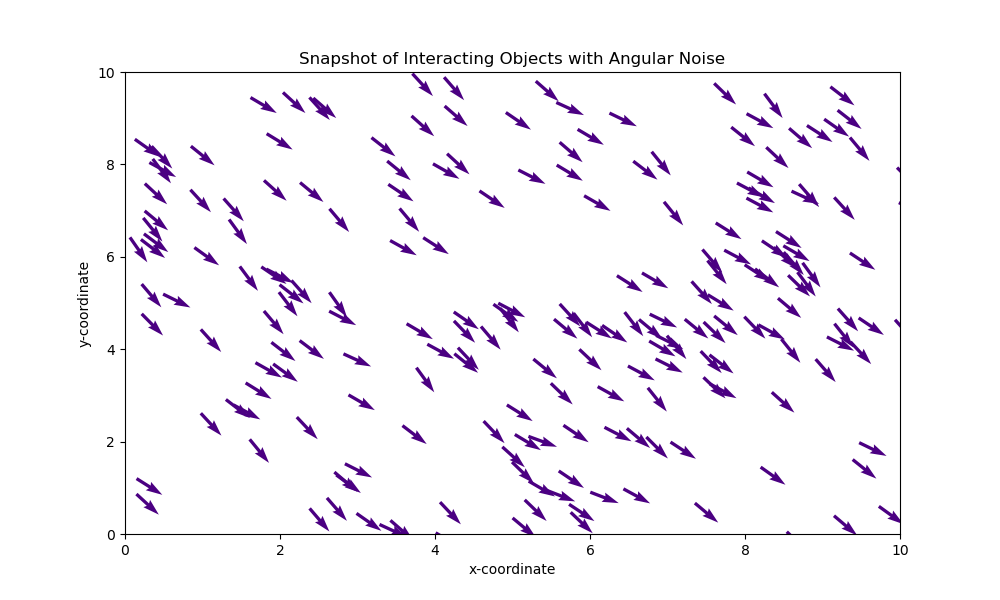

In [4]:
# 2 Problems, #2

import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.cm as cm 

%matplotlib ipympl
from matplotlib.animation import FuncAnimation

def initialize(N, L):
    x = np.random.uniform(0, L, N)
    y = np.random.uniform(0, L, N)
    theta = np.random.uniform(-math.pi, math.pi, N)
    
    return x, y, theta

# initialize the state of the system with random positions and orientations
def initialize_system(N, L):
    positions = np.random.uniform(0, L, (N, 2))
    orientations = np.random.uniform(-np.pi, np.pi, N)
    return positions, orientations

def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        # find neighbors within radius r0, accounting for periodic boundary conditions
        dx = positions[:, 0] - positions[i, 0]
        dy = positions[:, 1] - positions[i, 1]
        dx = dx - L * np.round(dx / L)
        dy = dy - L * np.round(dy / L)
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # exclude self
        
        # calculate the average orientation of neighbors using formula provided in the manuscript
        if np.any(neighbors):  # if there are any neighbors
            average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                             np.cos(orientations[neighbors]).mean())
            new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
        else:
            # if no neighbors, just add random noise to orientation
            new_orientations[i] += np.random.uniform(-eta/2, eta/2)
            
    return new_orientations

# evolve the system with interactions
def evolve_system_with_interactions(positions, orientations, L, r0, eta, delta_t, time_steps):
    for _ in range(time_steps):
        # aligning orientations with neighbors
        orientations = align_orientation_with_neighbors(positions, orientations, L, r0, eta)
        
        # updating positions based on orientations
        positions[:, 0] = (positions[:, 0] + np.cos(orientations) * delta_t) % L
        positions[:, 1] = (positions[:, 1] + np.sin(orientations) * delta_t) % L
    
    return positions, orientations

def get_orientation_color(orientations, cmap='hsv'): 
    # generates color based on orientations
    # normalize the orientations between 0 and 1 for the colormap
    normalized_orientations = (orientations - np.min(orientations)) / (np.max(orientations) - np.min(orientations))
    # get the corresponding colormap
    colors = cm.get_cmap(cmap)(normalized_orientations)
    return colors

# parameters
L = 10
N = 200
r0 = 2  # interaction radius
eta = 0.5  # angular noise
delta_t = 1
time_steps = 250  # number of time steps to evolve the system

# initialize and evolve the system
positions, orientations = initialize_system(N, L)
positions, orientations = evolve_system_with_interactions(positions, orientations, L, r0, eta, delta_t, time_steps)

colors = get_orientation_color(orientations)

# plotting a snapshot of the system
plt.figure(figsize=(10, 6))
plt.quiver(positions[:, 0], positions[:, 1], np.cos(orientations), np.sin(orientations), color='indigo')
plt.xlim(0, L)
plt.ylim(0, L)
plt.title('Snapshot of Interacting Objects with Angular Noise')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

<IPython.core.display.Javascript object>


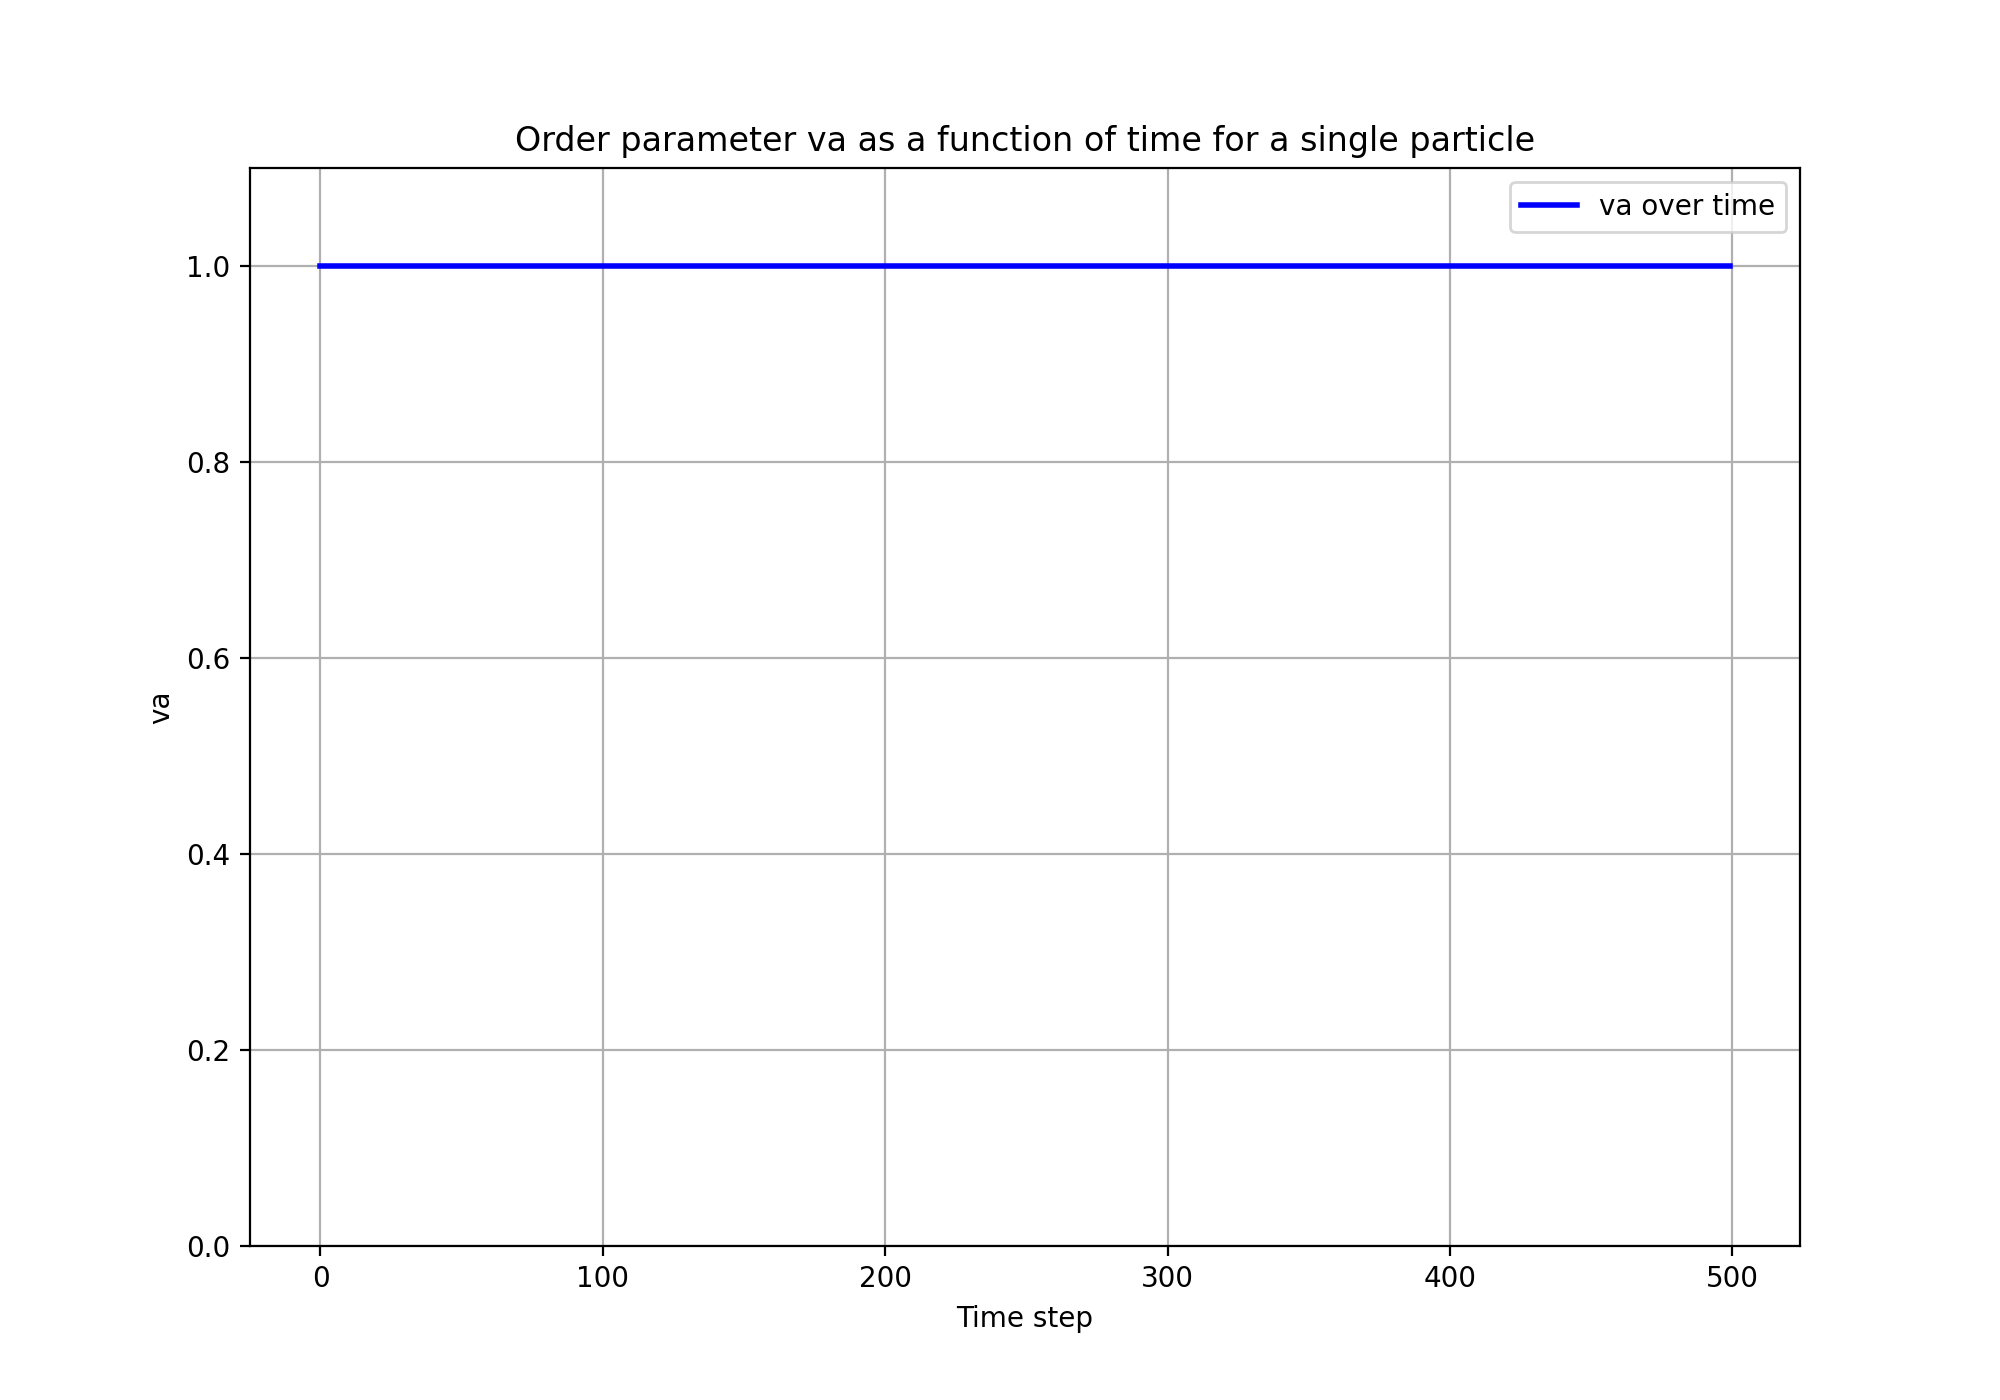

In [8]:
# 3 problems, #1

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the order parameter for a single particle
def order_parameter(velocity):
    # since there's only one particle, the order parameter is just the magnitude of the velocity
    # normalized by the speed
    return np.linalg.norm(velocity) / speed

# defining the speed and the constant orientation for the particle
speed = 1  # constant speed of the particle
orientation = 0  # constant orientation (direction) of the particle

# velocity vector from the speed and orientation
velocity = np.array([speed * np.cos(orientation), speed * np.sin(orientation)])

# order parameter, (constant in this case)
va = order_parameter(velocity)

# Number of time steps for the simulation
time_steps = 500

# creating a time array for plotting
time = np.arange(time_steps)

# plotting order parameter over time
plt.figure(figsize=(10, 7))
plt.plot(time, np.full(time.shape, va), label='va over time', color='blue', linewidth=2)
plt.title('Order parameter va as a function of time for a single particle')
plt.xlabel('Time step')
plt.ylabel('va')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()


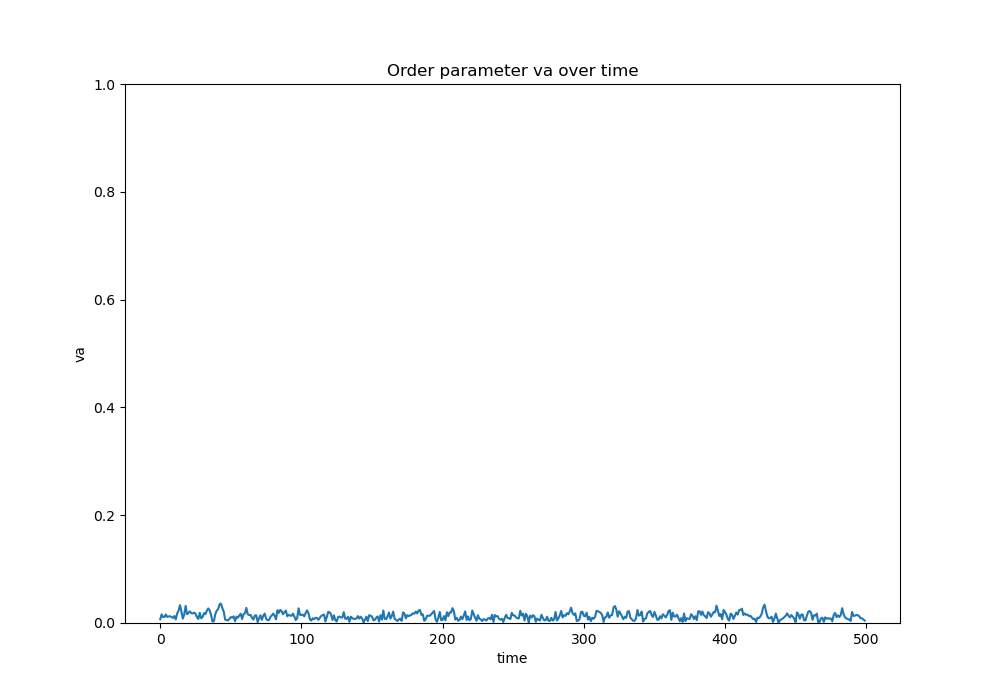

In [5]:
# 3 problems, #2

import numpy as np
import matplotlib.pyplot as plt

# parameters
N = 5000 
L = 25.0 
eta = 3.0 
n_steps = 500  # Corrected variable name here
speed = 1 

# randomly initialize orientations
orientations = np.random.uniform(-np.pi, np.pi, N)

# calculate the order parameter va
def order_parameter(orientations, N, speed):
    # components of the velocity vectors
    vx = np.cos(orientations)
    vy = np.sin(orientations)
    
    # sums of velocity vector
    vx_sum = np.sum(vx)
    vy_sum = np.sum(vy)
    
    # calc the magnitude of the sum of the velocity vectors and normalize by N*speed
    va = np.sqrt(vx_sum**2 + vy_sum**2) / (N * speed)
    return va

# store the va values over time
va_values = np.zeros(n_steps)  # corrected variable name here

for t in range(n_steps):  # corrected variable name here
    # apply angular noise to orientation of each particle
    orientations += np.random.uniform(-eta/2, eta/2, N)
    
    # ensuring orientations remain between -pi and pi
    orientations = (orientations + np.pi) % (2 * np.pi) - np.pi
    
    # va for this time step
    va_values[t] = order_parameter(orientations, N, speed)
    
# plot the result
plt.figure(figsize=(10, 7))
plt.plot(va_values)
plt.xlabel('time')
plt.ylabel('va')
plt.ylim(0, 1)
plt.title('Order parameter va over time')
plt.show()

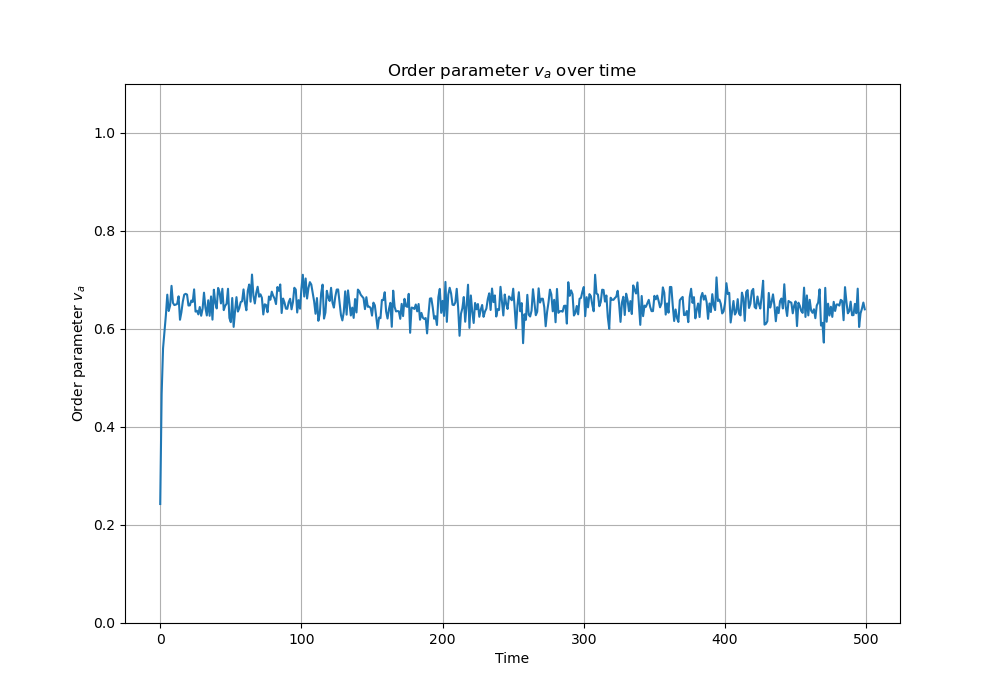

In [6]:
# 3 problems, #3

import numpy as np
import matplotlib.pyplot as plt
import math

# parameters:
L = 5
N = 200
r0 = 1  # interaction radius
eta = 3  # angular noise
delta_t = 1
time_steps = 500  # number of time steps to evolve system
v = 1

def initialize_system(N, L):
    positions = np.random.uniform(0, L, (N, 2))
    orientations = np.random.uniform(-np.pi, np.pi, N)
    return positions, orientations

def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = positions[:, 0] - positions[i, 0]
        dy = positions[:, 1] - positions[i, 1]
        dx = dx - L * np.round(dx / L)
        dy = dy - L * np.round(dy / L)
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # exclude self
        
        if np.any(neighbors):
            average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                             np.cos(orientations[neighbors]).mean())
            new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
        else:
            new_orientations[i] += np.random.uniform(-eta/2, eta/2)
            
    return new_orientations

def evolve_system_with_interactions(v, positions, orientations, L, r0, eta, delta_t, time_steps):
    va_values = []
    
    for _ in range(time_steps):
        orientations = align_orientation_with_neighbors(positions, orientations, L, r0, eta)
        positions[:, 0] = (positions[:, 0] + v*np.cos(orientations) * delta_t) % L
        positions[:, 1] = (positions[:, 1] + v*np.sin(orientations) * delta_t) % L
        
        # calculate order parameter (va) at each time step
        vx = np.cos(orientations)
        vy = np.sin(orientations)
        vx_sum = np.sum(vx)
        vy_sum = np.sum(vy)
        va = np.sqrt(vx_sum**2 + vy_sum**2) / (N * v)
        va_values.append(va)
    
    return positions, orientations, va_values


# initialize and evolve system
positions, orientations = initialize_system(N, L)
positions, orientations, va_values = evolve_system_with_interactions(v, positions, orientations, L, r0, eta, delta_t, time_steps)

# plot va as a function of time
plt.figure(figsize=(10, 7))
plt.plot(va_values)
plt.xlabel('Time')
plt.ylabel('Order parameter $v_a$')
plt.ylim(0, 1.1)
plt.title('Order parameter $v_a$ over time')
plt.grid(True)
plt.show()

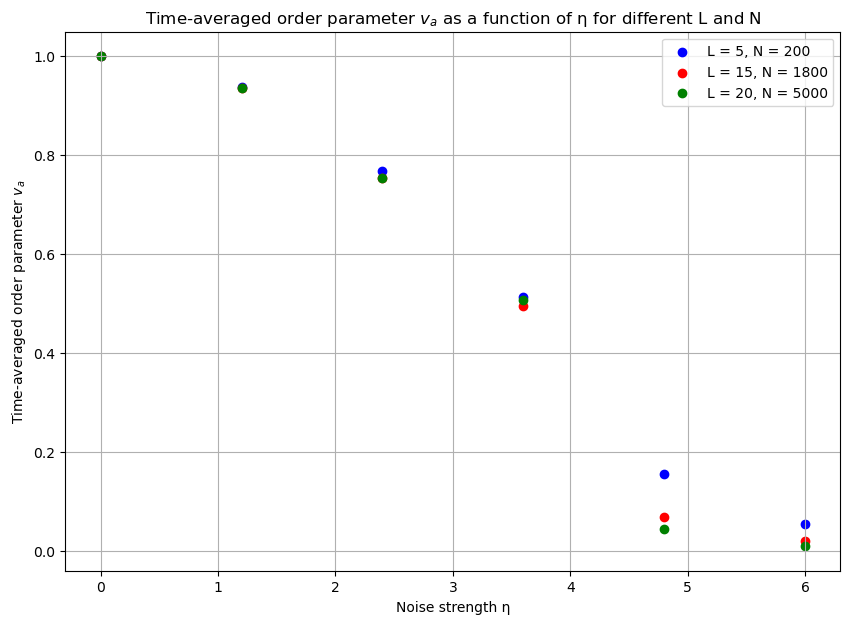

In [3]:
# 3 problems, #4

import numpy as np
import matplotlib.pyplot as plt
import math

# Define the simulation function
def simulate_system(v, N, L, r0, eta_values, delta_t, time_steps, steady_state_time):
    def initialize_system(N, L):
        positions = np.random.uniform(0, L, (N, 2))
        orientations = np.random.uniform(-np.pi, np.pi, N)
        return positions, orientations

    def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
        N = len(positions)
        new_orientations = np.copy(orientations)

        for i in range(N):
            dx = positions[:, 0] - positions[i, 0]
            dy = positions[:, 1] - positions[i, 1]
            dx = dx - L * np.round(dx / L)
            dy = dy - L * np.round(dy / L)
            distances = np.sqrt(dx**2 + dy**2)
            neighbors = (distances < r0) & (distances > 0)  # exclude self

            if np.any(neighbors):
                average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                                 np.cos(orientations[neighbors]).mean())
                new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta/2, eta/2)

        return new_orientations

    average_vas = []

    for eta in eta_values:
        positions, orientations = initialize_system(N, L)
        va_values = []

        for _ in range(time_steps):
            orientations = align_orientation_with_neighbors(positions, orientations, L, r0, eta)
            positions[:, 0] = (positions[:, 0] + v*np.cos(orientations) * delta_t) % L
            positions[:, 1] = (positions[:, 1] + v*np.sin(orientations) * delta_t) % L

            vx = np.cos(orientations)
            vy = np.sin(orientations)
            vx_sum = np.sum(vx)
            vy_sum = np.sum(vy)
            va = np.sqrt(vx_sum**2 + vy_sum**2) / (N * v)
            va_values.append(va)

        average_va = np.median(va_values[-steady_state_time:])
        average_vas.append(average_va)

    return eta_values, average_vas

# Parameters
parameters = [
    {"L": 5, "N": 200, "color": "blue"},
    {"L": 15, "N": 1800, "color": "red"},
    {"L": 20, "N": 5000, "color": "green"}
]

r0 = 1
delta_t = 1
v = 1
time_steps = 500
steady_state_time = 100  # time after which the system reaches steady state
eta_values = np.linspace(0, 6, 6)  # generate 6 values of η between 0 and 6

# Plotting
plt.figure(figsize=(10, 7))
for param in parameters:
    eta_values, average_vas = simulate_system(v, param["N"], param["L"], r0, eta_values, delta_t, time_steps, steady_state_time)
    plt.scatter(eta_values, average_vas, color=param["color"], label=f'L = {param["L"]}, N = {param["N"]}')

plt.xlabel('Noise strength η')
plt.ylabel('Time-averaged order parameter $v_a$')
plt.title('Time-averaged order parameter $v_a$ as a function of η for different L and N')
plt.legend()
plt.grid(True)
plt.show()


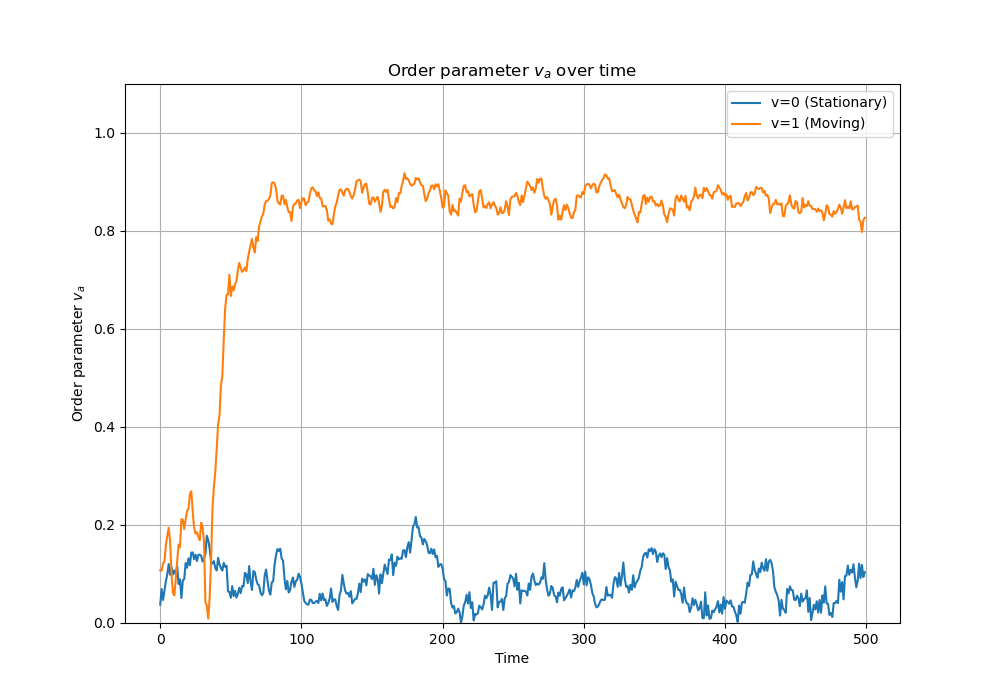

In [2]:
#3.6

import numpy as np
import matplotlib.pyplot as plt

# parameters:
L = 20
N = 200
r0 = 1  # interaction radius
eta = 1  # angular noise
delta_t = 1
time_steps = 500  # number of time steps to evolve system

# Function to initialize the system with positions and orientations
def initialize_system(N, L):
    positions = np.random.uniform(0, L, (N, 2))
    orientations = np.random.uniform(-np.pi, np.pi, N)
    return positions, orientations

# Function to align orientation with neighbors considering periodic boundary conditions
def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = positions[:, 0] - positions[i, 0]
        dy = positions[:, 1] - positions[i, 1]
        dx = dx - L * np.round(dx / L)
        dy = dy - L * np.round(dy / L)
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # exclude self
        
        if np.any(neighbors):
            average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                             np.cos(orientations[neighbors]).mean())
            new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
        else:
            new_orientations[i] += np.random.uniform(-eta/2, eta/2)
            
    return new_orientations

# Function to evolve the system with interactions and calculate the order parameter
def evolve_system_with_interactions(v, positions, orientations, L, r0, eta, delta_t, time_steps):
    va_values = []
    
    for _ in range(time_steps):
        orientations = align_orientation_with_neighbors(positions, orientations, L, r0, eta)
        positions[:, 0] = (positions[:, 0] + v*np.cos(orientations) * delta_t) % L
        positions[:, 1] = (positions[:, 1] + v*np.sin(orientations) * delta_t) % L
        # calc va at each time step using complex exponential form
        order_param = np.sum(np.exp(1j * orientations)) / N
        va = np.abs(order_param)
        va_values.append(va)
    
    return va_values

# Initialize systems
positions_v0, orientations_v0 = initialize_system(N, L)
positions_v1, orientations_v1 = initialize_system(N, L)

# Evolve systems and calculate order par+ameters
va_values_v0 = evolve_system_with_interactions(0, positions_v0, orientations_v0, L, r0, eta, delta_t, time_steps)
va_values_v1 = evolve_system_with_interactions(1, positions_v1, orientations_v1, L, r0, eta, delta_t, time_steps)

# Plot va as a function of time for both stationary and moving particles
plt.figure(figsize=(10, 7))
plt.plot(va_values_v0, label='v=0 (Stationary)')
plt.plot(va_values_v1, label='v=1 (Moving)')
plt.xlabel('Time')
plt.ylabel('Order parameter $v_a$')
plt.ylim(0, 1.1)
plt.title('Order parameter $v_a$ over time')
plt.legend()
plt.grid(True)
plt.show()

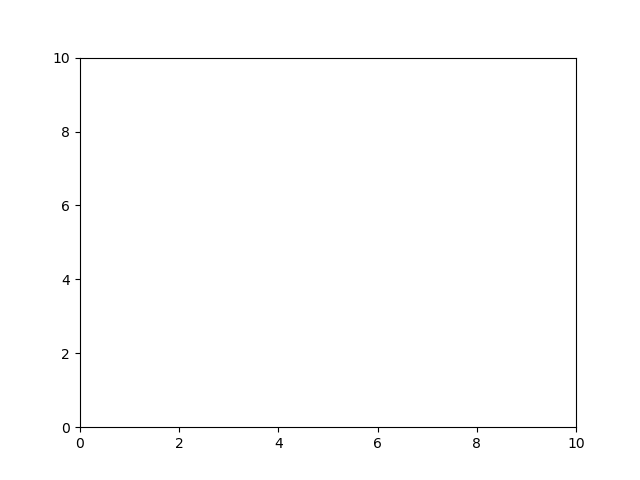

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge

# Parameters
L = 10
N_predators = 20
N_prey = 180
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 0.5  # Angular noise for prey
delta_t = 1
speed_predator = 0.05
speed_prey = 0.03

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0):
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        angle_diffs = np.abs(angles_to_prey - orientations_predator[i]) % (2 * np.pi)
        # Check if prey is within vision cone and interaction radius
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        prey_indices = np.where(in_vision & in_range)[0]
        if prey_indices.size > 0:
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
    return orientations_predator

# Initialize system
positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
predators, = ax.plot([], [], 'r^', markersize=8)  # Red triangles for predators
prey, = ax.plot([], [], 'bo', markersize=5)  # Blue circles for prey

vision_cones = []

def init():
    predators.set_data([], [])
    prey.set_data([], [])
    # remove old wedges from the axes, if any
    for wedge in vision_cones:
        wedge.remove()
    vision_cones.clear()
    return predators, prey,

def animate(i):
    global positions_predators, orientations_predators, positions_prey, orientations_prey
    
    # Update predator orientations to chase prey
    orientations_predators = update_predator_orientation(positions_predators, positions_prey, orientations_predators, vision_angle_predator, r0_predator)
    
    # Simulate prey evasion and random movement (simplified)
    orientations_prey += np.random.uniform(-eta_prey, eta_prey, N_prey)
    
    # Update positions
    positions_predators = update_orientation_and_position(positions_predators, orientations_predators, np.full(N_predators, speed_predator), L)
    positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
    
    predators.set_data(positions_predators[:, 0], positions_predators[:, 1])
    prey.set_data(positions_prey[:, 0], positions_prey[:, 1])
    # Update vision cones
    # Remove old wedges from the axes, if any
    for wedge in vision_cones:
        wedge.remove()
    vision_cones.clear()

    # Draw new wedges
    for pos, orientation in zip(positions_predators, orientations_predators):
        start_angle = np.degrees(orientation - vision_angle_predator / 2)
        end_angle = np.degrees(orientation + vision_angle_predator / 2)
        wedge = Wedge(pos, r0_predator, start_angle, end_angle, color='r', alpha=0.2)
        ax.add_patch(wedge)
        vision_cones.append(wedge)
    
    return predators, prey,

ani = FuncAnimation(fig, animate, init_func=init, blit=True, interval=100, frames=200)

plt.show()

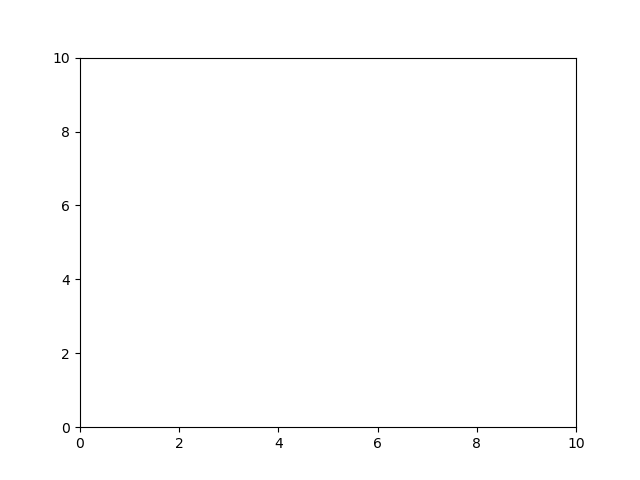

In [2]:
#One predator, Vicsek flocking

import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 0.5  # Angular noise for prey
delta_t = 1
speed_predator = 0.05
speed_prey = 0.03

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        # Find neighbors within radius r0, accounting for periodic boundary conditions
        dx = positions[:, 0] - positions[i, 0]
        dy = positions[:, 1] - positions[i, 1]
        dx = dx - L * np.round(dx / L)
        dy = dy - L * np.round(dy / L)
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self
        
        # Calculate the average orientation of neighbors
        if np.any(neighbors):  # If there are any neighbors
            average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                             np.cos(orientations[neighbors]).mean())
            new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
        else:
            # If no neighbors, just add random noise to orientation
            new_orientations[i] += np.random.uniform(-eta/2, eta/2)
    
    return new_orientations

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0):
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        angle_diffs = np.abs(angles_to_prey - orientations_predator[i]) % (2 * np.pi)
        # Check if prey is within vision cone and interaction radius
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        prey_indices = np.where(in_vision & in_range)[0]
        if prey_indices.size > 0:
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
    return orientations_predator

# Initialize system
positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
predators, = ax.plot([], [], 'r^', markersize=8)  # Red triangles for predators
prey, = ax.plot([], [], 'bo', markersize=5)  # Blue circles for prey

vision_cones = []

def init():
    predators.set_data([], [])
    prey.set_data([], [])
    # remove old wedges from the axes, if any
    for wedge in vision_cones:
        wedge.remove()
    vision_cones.clear()
    return predators, prey,

def animate(i):
    global positions_predators, orientations_predators, positions_prey, orientations_prey
    
    # First, update predator orientations to chase the nearest prey
    orientations_predators = update_predator_orientation(positions_predators, positions_prey, orientations_predators, vision_angle_predator, r0_predator)
    
    # Then, update predator positions based on their new orientations
    positions_predators = update_orientation_and_position(positions_predators, orientations_predators, np.full(N_predators, speed_predator), L)
    
    # Align prey orientations with their neighbors following the Vicsek model
    orientations_prey = align_orientation_with_neighbors(positions_prey, orientations_prey, L, r0_prey, eta_prey)
    
    # Update prey positions based on their new orientations
    positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
    
    # Update plots
    predators.set_data(positions_predators[:, 0], positions_predators[:, 1])
    prey.set_data(positions_prey[:, 0], positions_prey[:, 1])
    
    # Update vision cones
    # Clear old wedges from the axes
    for wedge in vision_cones:
        wedge.remove()
    vision_cones.clear()

    # Draw new wedges for predator's field of vision
    for pos, orientation in zip(positions_predators, orientations_predators):
        start_angle = np.degrees(orientation - vision_angle_predator / 2)
        end_angle = np.degrees(orientation + vision_angle_predator / 2)
        wedge = Wedge(pos, r0_predator, start_angle, end_angle, color='r', alpha=0.2)
        ax.add_patch(wedge)
        vision_cones.append(wedge)
    
    return predators, prey, *vision_cones

ani = FuncAnimation(fig, animate, init_func=init, frames=200, interval=100, blit=True)
plt.show()


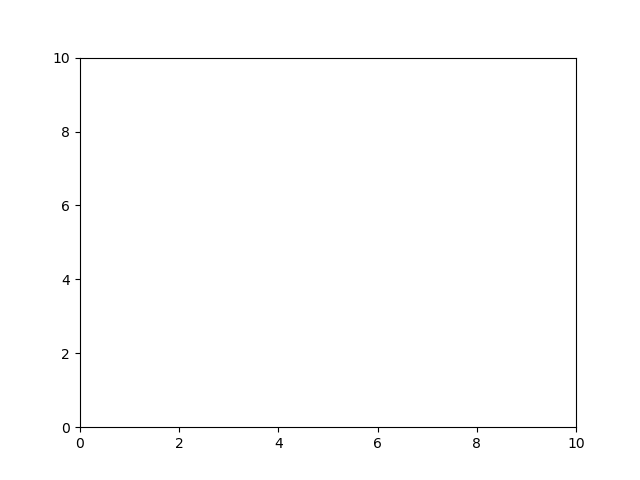

In [3]:
#One predator, Vicsek flock (better flocking!) Now with marked currently pursued prey 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 0.5  # Angular noise for prey
delta_t = 1
speed_predator = 0.05
speed_prey = 0.03

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        # Find neighbors within radius r0, accounting for periodic boundary conditions
        dx = positions[:, 0] - positions[i, 0]
        dy = positions[:, 1] - positions[i, 1]
        dx = dx - L * np.round(dx / L)
        dy = dy - L * np.round(dy / L)
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self
        
        # Calculate the average orientation of neighbors
        if np.any(neighbors):  # If there are any neighbors
            average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                             np.cos(orientations[neighbors]).mean())
            new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
        else:
            # If no neighbors, just add random noise to orientation
            new_orientations[i] += np.random.uniform(-eta/2, eta/2)
    
    return new_orientations

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0):
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        angle_diffs = np.abs(angles_to_prey - orientations_predator[i]) % (2 * np.pi)
        # Check if prey is within vision cone and interaction radius
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        prey_indices = np.where(in_vision & in_range)[0]
        if prey_indices.size > 0:
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
    return orientations_predator

# Initialize system
positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
predators, = ax.plot([], [], 'r^', markersize=8)  # Red triangles for predators
prey, = ax.plot([], [], 'bo', markersize=5)  # Blue circles for prey

vision_cones = []

def init():
    predators.set_data([], [])
    prey.set_data([], [])
    # remove old wedges from the axes, if any
    for wedge in vision_cones:
        wedge.remove()
    vision_cones.clear()
    return predators, prey,

def animate(i):
    global positions_predators, orientations_predators, positions_prey, orientations_prey
    
    # First, update predator orientations to chase the nearest prey
    orientations_predators = update_predator_orientation(positions_predators, positions_prey, orientations_predators, vision_angle_predator, r0_predator)
    
    # Then, update predator positions based on their new orientations
    positions_predators = update_orientation_and_position(positions_predators, orientations_predators, np.full(N_predators, speed_predator), L)
    
    # Align prey orientations with their neighbors following the Vicsek model
    orientations_prey = align_orientation_with_neighbors(positions_prey, orientations_prey, L, r0_prey, eta_prey)
    
    # Update prey positions based on their new orientations
    positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
    
    # Clear the previous frame's drawings
    ax.clear()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    
    # Plot all prey
    prey.set_data(positions_prey[:, 0], positions_prey[:, 1])
    ax.scatter(positions_prey[:, 0], positions_prey[:, 1], color='blue', s=30)
    
    # Identify and plot the prey being chased with a different color
    if len(orientations_predators) > 0:  # Check if there is at least one predator
        predator_orientation = orientations_predators[0]
        predator = positions_predators[0]  # Assuming there is only one predator (for simplicity)
        vectors_to_prey = positions_prey - predator
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        # Determine the angle differences within the vision cone
        angle_diffs = np.abs((angles_to_prey - predator_orientation + np.pi) % (2 * np.pi) - np.pi)
        in_vision = (angle_diffs < vision_angle_predator / 2)
        
        # Filter for prey that is both in vision and within the interaction radius
        prey_in_vision_and_range = in_vision & (distances < r0_predator)
        
    # Now, find the nearest prey within the vision cone
    if np.any(prey_in_vision_and_range):
        # Get indices of prey that are in vision and range, then find the nearest one
        prey_indices = np.where(prey_in_vision_and_range)[0]
        nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
        chased_prey_position = positions_prey[nearest_prey_index]
        
        # Highlight the chased prey
        ax.scatter(chased_prey_position[0], chased_prey_position[1], color='red', s=50, edgecolors='black', zorder=5)

    
    # Plot the predator
    predators.set_data(positions_predators[:, 0], positions_predators[:, 1])
    ax.scatter(positions_predators[:, 0], positions_predators[:, 1], color='red', marker='^', s=50)
    
    # Update vision cones
    vision_cones.clear()  # Clear old vision cones
    for pos, orientation in zip(positions_predators, orientations_predators):
        start_angle = np.degrees(orientation - vision_angle_predator / 2)
        end_angle = np.degrees(orientation + vision_angle_predator / 2)
        wedge = Wedge(pos, r0_predator, start_angle, end_angle, color='red', alpha=0.2)
        ax.add_patch(wedge)
        vision_cones.append(wedge)
    
    return predators, prey, *vision_cones

ani = FuncAnimation(fig, animate, init_func=init, frames=200, interval=100, blit=False)
plt.show()

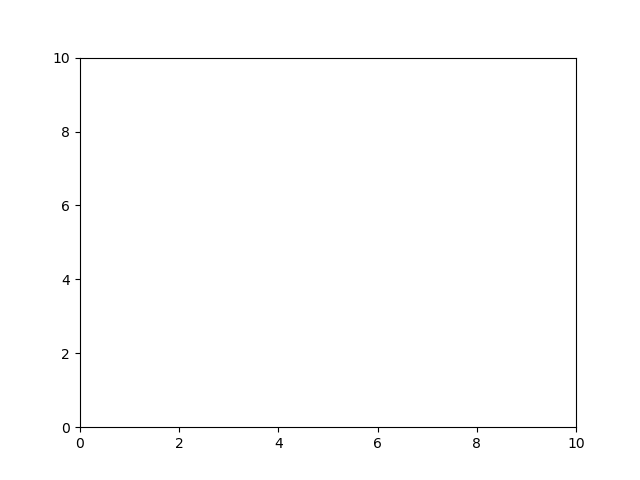

In [1]:
# Adjusting wedge function for crossing bounds, added periodic boundary checking for marked prey (now the marked prey is correctly shown across a border)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 0.1  # Angular noise for prey
delta_t = 1
speed_predator = 0.05
speed_prey = 0.03

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        # Find neighbors within radius r0, accounting for periodic boundary conditions
        dx = positions[:, 0] - positions[i, 0]
        dy = positions[:, 1] - positions[i, 1]
        dx = dx - L * np.round(dx / L)
        dy = dy - L * np.round(dy / L)
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self
        
        # Calculate the average orientation of neighbors
        if np.any(neighbors):  # If there are any neighbors
            average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                             np.cos(orientations[neighbors]).mean())
            new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
        else:
            # If no neighbors, just add random noise to orientation
            new_orientations[i] += np.random.uniform(-eta/2, eta/2)
    
    return new_orientations

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0, L):
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        # Adjust vectors for periodic boundary conditions
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        # Correcting angle differences to account for periodicity
        angle_diffs = np.abs((angles_to_prey - orientations_predator[i] + np.pi) % (2 * np.pi) - np.pi)
        
        # Check if prey is within vision cone and interaction radius
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        
        prey_indices = np.where(in_vision & in_range)[0]
        if prey_indices.size > 0:
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
    return orientations_predator


def adjust_vision_cone(pos, orientation, vision_angle, r0, L):
    start_angle = np.degrees(orientation - vision_angle / 2)
    end_angle = np.degrees(orientation + vision_angle / 2)
    cones = []

    # Create the main vision cone
    main_cone = Wedge(pos, r0, start_angle, end_angle, color='red', alpha=0.2)
    cones.append(main_cone)

    # Function to add extra wedge if boundary crossed
    def add_extra_wedge(x_offset, y_offset):
        extra_pos = (pos[0] + x_offset, pos[1] + y_offset)
        extra_cone = Wedge(extra_pos, r0, start_angle, end_angle, color='red', alpha=0.2)
        cones.append(extra_cone)

    # Check for horizontal boundary crossing
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) > L or pos[0] + r0 * np.cos(orientation - vision_angle / 2) > L:
        add_extra_wedge(-L, 0)
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) < 0 or pos[0] + r0 * np.cos(orientation - vision_angle / 2) < 0:
        add_extra_wedge(L, 0)

    # Check for vertical boundary crossing
    vertical_check_angles = [orientation - vision_angle / 2, orientation + vision_angle / 2]
    for angle in vertical_check_angles:
        if pos[1] + r0 * np.sin(angle) > L:
            add_extra_wedge(0, -L)
        if pos[1] + r0 * np.sin(angle) < 0:
            add_extra_wedge(0, L)

    return cones


# Initialize system
positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
predators, = ax.plot([], [], 'r^', markersize=8)  # Red triangles for predators
prey, = ax.plot([], [], 'bo', markersize=5)  # Blue circles for prey

vision_cones = []

def init():
    predators.set_data([], [])
    prey.set_data([], [])
    # remove old wedges from the axes, if any
    for wedge in vision_cones:
        wedge.remove()
    vision_cones.clear()
    return predators, prey,

def animate(i):
    global positions_predators, orientations_predators, positions_prey, orientations_prey
    
    # First, update predator orientations to chase the nearest prey
    orientations_predators = update_predator_orientation(
        positions_predators, positions_prey, orientations_predators,
        vision_angle_predator, r0_predator, L
    )
    
    # Then, update predator positions based on their new orientations
    positions_predators = update_orientation_and_position(
        positions_predators, orientations_predators, 
        np.full(N_predators, speed_predator), L
    )
    
    # Align prey orientations with their neighbors following the Vicsek model
    orientations_prey = align_orientation_with_neighbors(positions_prey, orientations_prey, L, r0_prey, eta_prey)
    
    # Update prey positions based on their new orientations
    positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
    
    # Clear the previous frame's drawings
    ax.clear()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    
    # Plot all prey
    prey.set_data(positions_prey[:, 0], positions_prey[:, 1])
    ax.scatter(positions_prey[:, 0], positions_prey[:, 1], color='blue', s=30)
    
    # Identify and color the prey being chased different color
    if len(orientations_predators) > 0:  # Check if there is at least one predator
        predator_orientation = orientations_predators[0]
        predator = positions_predators[0]  # Assuming there is only one predator (for simplicity)
        vectors_to_prey = positions_prey - predator
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        # Determine the angle differences within the vision cone
        angle_diffs = np.abs((angles_to_prey - predator_orientation + np.pi) % (2 * np.pi) - np.pi)
        in_vision = (angle_diffs < vision_angle_predator / 2)
        
        # Filter for prey that is both in vision and within the interaction radius
        prey_in_vision_and_range = in_vision & (distances < r0_predator)
        
    # Now, find the nearest prey within the vision cone
    if np.any(prey_in_vision_and_range):
        # Get indices of prey that are in vision and range, then find the nearest one
        prey_indices = np.where(prey_in_vision_and_range)[0]
        nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
        chased_prey_position = positions_prey[nearest_prey_index]
        
        # Highlight the chased prey
        ax.scatter(chased_prey_position[0], chased_prey_position[1], color='red', s=50, edgecolors='black', zorder=5)

    
    # Plot the predator
    predators.set_data(positions_predators[:, 0], positions_predators[:, 1])
    ax.scatter(positions_predators[:, 0], positions_predators[:, 1], color='red', marker='^', s=50)
    
    # Update vision cones
    vision_cones.clear()  # Clear old vision cones
    for pos, orientation in zip(positions_predators, orientations_predators):
        cones = adjust_vision_cone(pos, orientation, vision_angle_predator, r0_predator, L)
        for cone in cones:
            ax.add_patch(cone)
            vision_cones.append(cone)
    
    return predators, prey, *vision_cones

ani = FuncAnimation(fig, animate, init_func=init, frames=200, interval=100, blit=False)
plt.show()

In [2]:
# testing that predator correctly identifies the closest prey across a boundary
import numpy as np
import matplotlib.pyplot as plt

L = 10 
r0_predator = 1.5  # Predator interaction radius
vision_angle_predator = np.pi / 2

# Scenario where the prey is across the boundary from the predator
positions_predators = np.array([[9.5, 5]])  # Predator near the right boundary
positions_prey = np.array([[0.2, 5.1], [5, 6], [7.6, 5]])  # Prey across the boundary, and other prey

# Assume predator orientation towards the right, so it should see across the boundary 
orientations_predators = np.array([0])

# Function to calculate if prey is in vision and within radius (copied from cell above)
def test_prey_detection(positions_predators, positions_prey, orientations_predators, L, r0_predator, vision_angle_predator):
    predator = positions_predators[0]
    predator_orientation = orientations_predators[0]
    
    vectors_to_prey = positions_prey - predator
    vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
    vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2

    distances = np.linalg.norm(vectors_to_prey, axis=1)
    angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])

    angle_diffs = np.abs((angles_to_prey - predator_orientation + np.pi) % (2 * np.pi) - np.pi)
    in_vision = (angle_diffs < vision_angle_predator / 2)
    prey_in_vision_and_range = in_vision & (distances < r0_predator)

    if np.any(prey_in_vision_and_range):
        prey_indices = np.where(prey_in_vision_and_range)[0]
        nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
        chased_prey_position = positions_prey[nearest_prey_index]
        print("Nearest Prey Detected at:", chased_prey_position)
    else:
        print("No Prey Detected")

test_prey_detection(positions_predators, positions_prey, orientations_predators, L, r0_predator, vision_angle_predator)


Nearest Prey Detected at: [0.2 5.1]


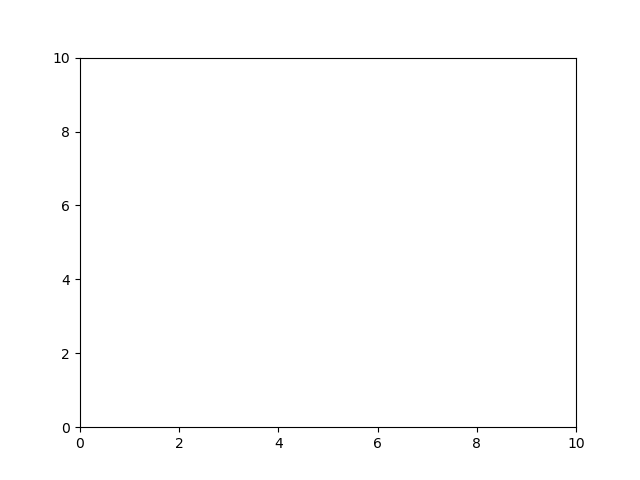

In [1]:
# Implementing Prey Evasion (moves to nearest neighbor)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Wedge

# Parameters
L = 10
N_predators = 1
N_prey = 100
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 0.5  # Angular noise for prey
delta_t = 1
speed_predator = 0.05
speed_prey = 0.03

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

# def align_orientation_with_neighbors(positions, orientations, L, r0, eta, predator_position, marked_prey_index=None):
#     N = len(positions)
#     new_orientations = np.copy(orientations)
    
#     for i in range(N):
#         # Calculate vectors to all other prey considering periodic boundary conditions
#         dx = positions[:, 0] - positions[i, 0] + L/2
#         dy = positions[:, 1] - positions[i, 1] + L/2
#         dx = (dx % L) - L/2
#         dy = (dy % L) - L/2
#         distances = np.sqrt(dx**2 + dy**2)
#         neighbors = (distances < r0) & (distances > 0)  # Exclude self

#         # Calculate the predator's vector and distance
#         predator_dx = (predator_position[0] - positions[i, 0] + L/2) % L - L/2
#         predator_dy = (predator_position[1] - positions[i, 1] + L/2) % L - L/2
#         predator_distance = np.sqrt(predator_dx**2 + predator_dy**2)

#         if predator_distance < r0:
#             # Exclude the predator explicitly
#             neighbors &= ~((np.isclose(dx, predator_dx, atol=0.1)) & (np.isclose(dy, predator_dy, atol=0.1)))

#         # Check for marked prey specific behavior
#         if i == marked_prey_index:
#             if np.any(neighbors):
#                 # Find nearest valid neighbor
#                 valid_neighbor_indices = np.where(neighbors)[0]
#                 nearest_neighbor_index = valid_neighbor_indices[np.argmin(distances[neighbors])]
#                 target_orientation = np.arctan2(dy[nearest_neighbor_index], dx[nearest_neighbor_index])
#                 new_orientations[i] = target_orientation
#                 print(f"Marked prey {i} moving towards prey {nearest_neighbor_index} away from predator.")
#             else:
#                 new_orientations[i] += np.random.uniform(-eta, eta)
#                 print(f"Marked prey {i} has no neighbors, moving randomly.")
#         else:
#             if np.any(neighbors):
#                 average_orientation = np.arctan2(np.sum(np.sin(orientations[neighbors])), np.sum(np.cos(orientations[neighbors])))
#                 new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
#             else:
#                 new_orientations[i] += np.random.uniform(-eta, eta)

#     return new_orientations

def align_orientation_with_neighbors(positions, orientations, L, r0, eta, predator_position, marked_prey_index=None):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = (positions[:, 0] - positions[i, 0] + L/2) % L - L/2
        dy = (positions[:, 1] - positions[i, 1] + L/2) % L - L/2
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # Exclude self

        # Handling the predator
        predator_dx = (predator_position[0] - positions[i, 0] + L/2) % L - L/2
        predator_dy = (predator_position[1] - positions[i, 1] + L/2) % L - L/2
        predator_distance = np.sqrt(predator_dx**2 + predator_dy**2)
        
        if predator_distance < r0:
            neighbors &= ~((np.isclose(dx, predator_dx, atol=0.1)) & (np.isclose(dy, predator_dy, atol=0.1)))

        if i == marked_prey_index:
            if np.any(neighbors):
                # Find the safest direction which is not towards the predator
                safe_neighbors = neighbors.copy()
                for j in np.where(neighbors)[0]:
                    if np.linalg.norm([dx[j] - predator_dx, dy[j] - predator_dy]) < r0:
                        safe_neighbors[j] = False  # Exclude neighbors too close to the predator

                if np.any(safe_neighbors):
                    nearest_safe_index = np.where(safe_neighbors)[0][np.argmin(distances[safe_neighbors])]
                    target_orientation = np.arctan2(dy[nearest_safe_index], dx[nearest_safe_index])
                else:
                    # If no safe neighbors, move directly away from the predator
                    target_orientation = np.arctan2(-predator_dy, -predator_dx)
                
                new_orientations[i] = target_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)
        else:
            # Standard behavior for other prey
            if np.any(neighbors):
                average_orientation = np.arctan2(np.sum(np.sin(orientations[neighbors])), np.sum(np.cos(orientations[neighbors])))
                new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta, eta)

    return new_orientations



def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0, L):
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        # Adjust vectors for periodic boundary conditions
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        # Correcting angle differences to account for periodicity
        angle_diffs = np.abs((angles_to_prey - orientations_predator[i] + np.pi) % (2 * np.pi) - np.pi)
        
        # Check if prey is within vision cone and interaction radius
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        
        prey_indices = np.where(in_vision & in_range)[0]
        if prey_indices.size > 0:
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
    return orientations_predator


def adjust_vision_cone(pos, orientation, vision_angle, r0, L):
    start_angle = np.degrees(orientation - vision_angle / 2)
    end_angle = np.degrees(orientation + vision_angle / 2)
    cones = []

    # Create the main vision cone
    main_cone = Wedge(pos, r0, start_angle, end_angle, color='red', alpha=0.2)
    cones.append(main_cone)

    # Function to add extra wedge if boundary crossed
    def add_extra_wedge(x_offset, y_offset):
        extra_pos = (pos[0] + x_offset, pos[1] + y_offset)
        extra_cone = Wedge(extra_pos, r0, start_angle, end_angle, color='red', alpha=0.2)
        cones.append(extra_cone)

    # Check for horizontal boundary crossing
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) > L or pos[0] + r0 * np.cos(orientation - vision_angle / 2) > L:
        add_extra_wedge(-L, 0)
    if pos[0] + r0 * np.cos(orientation + vision_angle / 2) < 0 or pos[0] + r0 * np.cos(orientation - vision_angle / 2) < 0:
        add_extra_wedge(L, 0)

    # Check for vertical boundary crossing
    vertical_check_angles = [orientation - vision_angle / 2, orientation + vision_angle / 2]
    for angle in vertical_check_angles:
        if pos[1] + r0 * np.sin(angle) > L:
            add_extra_wedge(0, -L)
        if pos[1] + r0 * np.sin(angle) < 0:
            add_extra_wedge(0, L)

    return cones


# Initialize system
positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
predators, = ax.plot([], [], 'r^', markersize=8)  # Red triangles for predators
prey, = ax.plot([], [], 'bo', markersize=5)  # Blue circles for prey

vision_cones = []

def init():
    predators.set_data([], [])
    prey.set_data([], [])
    # remove old wedges from the axes, if any
    for wedge in vision_cones:
        wedge.remove()
    vision_cones.clear()
    return predators, prey,

def animate(i):
    global positions_predators, orientations_predators, positions_prey, orientations_prey
    
    orientations_predators = update_predator_orientation(
        positions_predators, positions_prey, orientations_predators, 
        vision_angle_predator, r0_predator, L
    )
    positions_predators = update_orientation_and_position(
        positions_predators, orientations_predators, 
        np.full(N_predators, speed_predator), L
    )

    # Clear the previous frame's drawings
    ax.clear()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    
    # Check if there is at least one predator
    if len(orientations_predators) > 0:
        predator_orientation = orientations_predators[0]
        predator = positions_predators[0]
        
        # Calculate vectors to all prey and adjust for periodic boundaries
        vectors_to_prey = positions_prey - predator
        vectors_to_prey[:, 0] = (vectors_to_prey[:, 0] + L / 2) % L - L / 2
        vectors_to_prey[:, 1] = (vectors_to_prey[:, 1] + L / 2) % L - L / 2
        
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        
        # Determine angle differences within the vision cone
        angle_diffs = np.abs((angles_to_prey - predator_orientation + np.pi) % (2 * np.pi) - np.pi)
        in_vision = (angle_diffs < vision_angle_predator / 2)
        
        # Filter for prey in vision and within interaction radius
        prey_in_vision_and_range = in_vision & (distances < r0_predator)
        
        # Find the nearest prey within the vision cone
        if np.any(prey_in_vision_and_range):
            prey_indices = np.where(prey_in_vision_and_range)[0]
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
        else:
            nearest_prey_index = None
    else:
        nearest_prey_index = None
    
    # Update prey orientations with potential evasion behavior
    orientations_prey = align_orientation_with_neighbors(
        positions_prey, orientations_prey, L, r0_prey, eta_prey, 
        positions_predators[0], nearest_prey_index
    )
    
    # Update prey positions based on their new orientations
    positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
    
    # Plot all prey and mark the chased prey if identified
    prey.set_data(positions_prey[:, 0], positions_prey[:, 1])
    ax.scatter(positions_prey[:, 0], positions_prey[:, 1], color='blue', s=30)
    if nearest_prey_index is not None:
        chased_prey_position = positions_prey[nearest_prey_index]
        ax.scatter(chased_prey_position[0], chased_prey_position[1], color='red', s=50, edgecolors='black', zorder=5)

    # Plot the predator
    predators.set_data(positions_predators[:, 0], positions_predators[:, 1])
    ax.scatter(positions_predators[:, 0], positions_predators[:, 1], color='red', marker='^', s=50)
    
    # Update vision cones
    vision_cones.clear()
    for pos, orientation in zip(positions_predators, orientations_predators):
        cones = adjust_vision_cone(pos, orientation, vision_angle_predator, r0_predator, L)
        for cone in cones:
            ax.add_patch(cone)
            vision_cones.append(cone)
    
    return predators, prey, *vision_cones


ani = FuncAnimation(fig, animate, init_func=init, frames=200, interval=100, blit=False)
plt.show()